#Greisy Jhoana, Delgado Gaona

# Regresión lineal del precio de la vivienda en EE. UU.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Primer de regresión lineal

En estadística, la regresión lineal es un enfoque lineal para modelar la relación entre una variable dependiente escalar y y una o más variables explicativas (o variables independientes) denominadas X. El caso de una variable explicativa se denomina regresión lineal simple. Para más de una variable explicativa, el proceso se denomina regresión lineal múltiple.

Los modelos de regresión lineal a menudo se ajustan utilizando el enfoque de mínimos cuadrados, pero también pueden ajustarse de otras formas, como minimizando la "falta de ajuste" en alguna otra norma (como con la regresión de desviaciones mínimas absolutas), o minimizando una penalización. versión de la función de pérdida por mínimos cuadrados como en la regresión de crestas (penalización de $L_2$ -norm) y lazo (penalización de $L_1$ -norm). Por el contrario, el enfoque de mínimos cuadrados se puede utilizar para ajustar modelos que no son modelos lineales. Por lo tanto, aunque los términos "mínimos cuadrados" y "modelo lineal" están estrechamente relacionados, no son sinónimos.

### Importando paquetes y el conjunto de datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [12]:
df = pd.read_csv("/ad_viz_plotval_data.csv")
# df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/healthcare_dataset.csv")

df.head()  # vemos los 5 primeros datos del dataframe

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/05/2022,AQS,40230004,1,20.8,ug/m3 LC,73,NOGALES POST OFFICE,1,100.0,...,143,R & P Model 2000 PM-2.5 Air Sampler w/VSCC,35700,"Nogales, AZ",4,Arizona,23,Santa Cruz,31.337204,-110.936718
1,01/11/2022,AQS,40230004,1,11.1,ug/m3 LC,55,NOGALES POST OFFICE,1,100.0,...,143,R & P Model 2000 PM-2.5 Air Sampler w/VSCC,35700,"Nogales, AZ",4,Arizona,23,Santa Cruz,31.337204,-110.936718
2,01/17/2022,AQS,40230004,1,16.9,ug/m3 LC,66,NOGALES POST OFFICE,1,100.0,...,143,R & P Model 2000 PM-2.5 Air Sampler w/VSCC,35700,"Nogales, AZ",4,Arizona,23,Santa Cruz,31.337204,-110.936718
3,01/23/2022,AQS,40230004,1,8.6,ug/m3 LC,48,NOGALES POST OFFICE,1,100.0,...,143,R & P Model 2000 PM-2.5 Air Sampler w/VSCC,35700,"Nogales, AZ",4,Arizona,23,Santa Cruz,31.337204,-110.936718
4,01/29/2022,AQS,40230004,1,10.2,ug/m3 LC,53,NOGALES POST OFFICE,1,100.0,...,143,R & P Model 2000 PM-2.5 Air Sampler w/VSCC,35700,"Nogales, AZ",4,Arizona,23,Santa Cruz,31.337204,-110.936718


### Consultar información básica sobre el conjunto de datos

**El método 'info()'los tipos y números de datos**

In [55]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Source                          525 non-null    object 
 1   Site ID                         525 non-null    int64  
 2   POC                             525 non-null    int64  
 3   Daily Mean PM2.5 Concentration  525 non-null    float64
 4   Units                           525 non-null    object 
 5   Daily AQI Value                 525 non-null    int64  
 6   Local Site Name                 525 non-null    object 
 7   Daily Obs Count                 525 non-null    int64  
 8   Percent Complete                525 non-null    float64
 9   AQS Parameter Code              525 non-null    int64  
 10  AQS Parameter Description       525 non-null    object 
 11  Method Code                     525 non-null    int64  
 12  Method Description              525 

**El método 'describe()' obtiene un resumen de estadísticas de las características del conjunto de datos**

In [14]:
df.describe()


,Site ID,POC,Daily Mean PM2.5 Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,AQS Parameter Code,Method Code,CBSA Code,State FIPS Code,County FIPS Code,Site Latitude,Site Longitude
count,5.250000e+02,525.000000,525.000000,525.000000,525.0,525.0,525.000000,525.000000,525.0,525.0,525.0,525.000000,525.000000
mean,4.023194e+07,2.337143,8.880000,41.725714,1.0,100.0,88187.310476,282.445714,35700.0,4.0,23.0,31.337257,-110.936811
std,3.700769e+03,0.942351,6.242131,18.596586,0.0,0.0,164.963137,222.717625,0.0,0.0,0.0,0.000101,0.000178
min,4.023000e+07,1.000000,1.800000,10.000000,1.0,100.0,88101.000000,143.000000,35700.0,4.0,23.0,31.337204,-110.937150
25%,4.023000e+07,1.000000,4.900000,27.000000,1.0,100.0,88101.000000,170.000000,35700.0,4.0,23.0,31.337204,-110.936718
50%,4.023000e+07,3.000000,7.100000,39.000000,1.0,100.0,88101.000000,170.000000,35700.0,4.0,23.0,31.337204,-110.936718
75%,4.023000e+07,3.000000,10.400000,53.000000,1.0,100.0,88101.000000,170.000000,35700.0,4.0,23.0,31.337204,-110.936718
max,4.023900e+07,3.000000,50.400000,138.000000,1.0,100.0,88502.000000,707.000000,35700.0,4.0,23.0,31.337450,-110.936718


**El método 'columns' obtiene los nombres de las columnas (características)**

In [24]:
df.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'Method Description', 'CBSA Code', 'CBSA Name',
       'State FIPS Code', 'State', 'County FIPS Code', 'County',
       'Site Latitude', 'Site Longitude'],
      dtype='object')

### Visualización básica del conjunto de datos

**Pairplots usando seaborn**

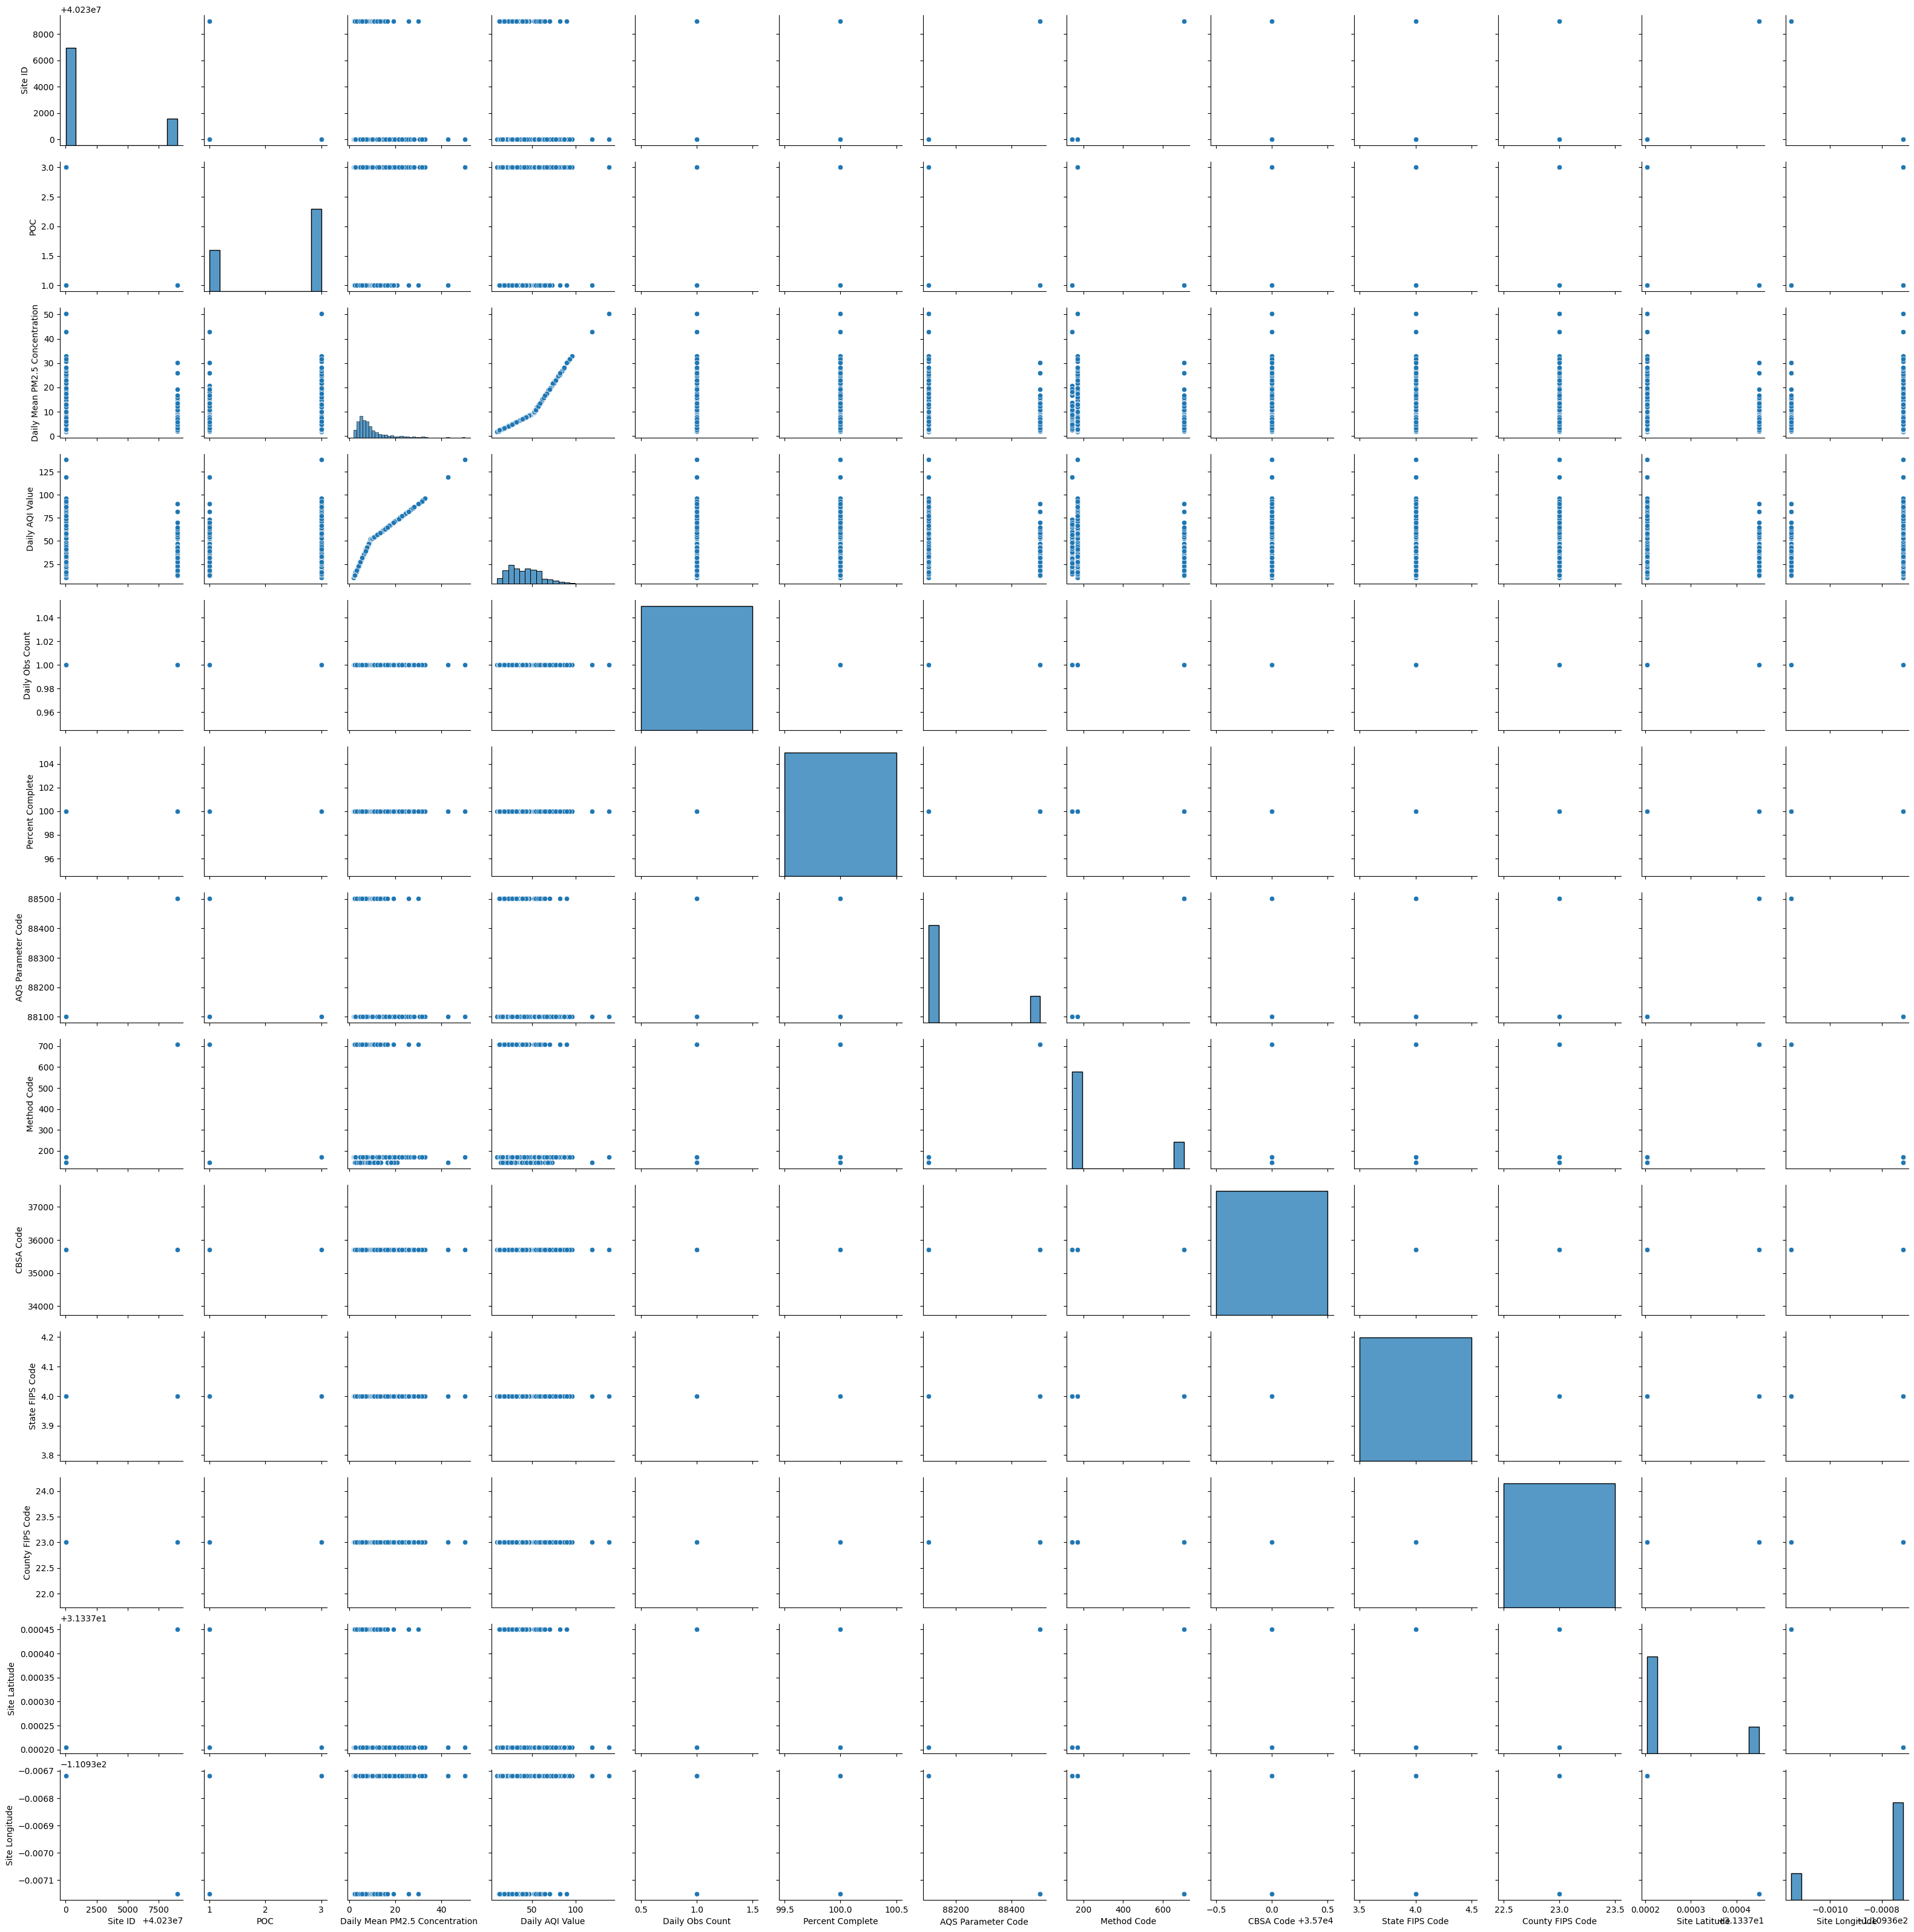

In [25]:
sns.pairplot(df)

:**Distribución de la concentración PM2.5 (la cantidad prevista)**

<Axes: ylabel='Frequency'>

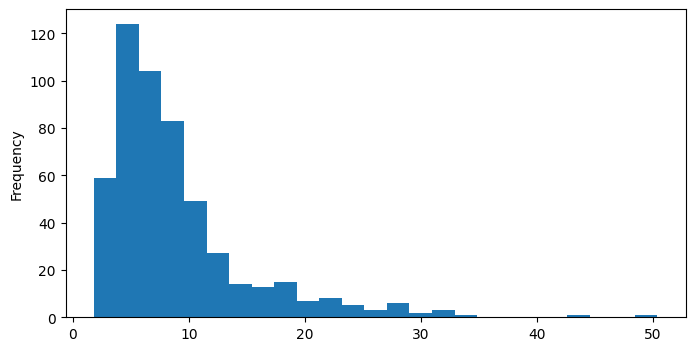

In [18]:
df['Daily Mean PM2.5 Concentration'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

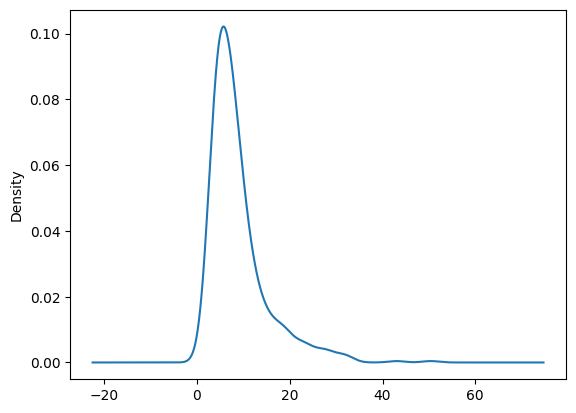

In [19]:
df['Daily Mean PM2.5 Concentration'].plot.density()

**Matriz de correlación y heatmap**

In [26]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Site ID,POC,Daily Mean PM2.5 Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,AQS Parameter Code,Method Code,CBSA Code,State FIPS Code,County FIPS Code,Site Latitude,Site Longitude
Site ID,1.000000,-0.743823,-0.150300,-0.173872,NaN,NaN,1.000000,0.999271,NaN,NaN,NaN,1.000000,-1.000000
POC,-0.743823,1.000000,0.148019,0.167981,NaN,NaN,-0.743823,-0.717763,NaN,NaN,NaN,-0.743823,0.743823
Daily Mean PM2.5 Concentration,-0.150300,0.148019,1.000000,0.952863,NaN,NaN,-0.150300,-0.148122,NaN,NaN,NaN,-0.150300,0.150300
Daily AQI Value,-0.173872,0.167981,0.952863,1.000000,NaN,NaN,-0.173872,-0.171537,NaN,NaN,NaN,-0.173872,0.173872
Daily Obs Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Percent Complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AQS Parameter Code,1.000000,-0.743823,-0.150300,-0.173872,NaN,NaN,1.000000,0.999271,NaN,NaN,NaN,1.000000,-1.000000
Method Code,0.999271,-0.717763,-0.148122,-0.171537,NaN,NaN,0.999271,1.000000,NaN,NaN,NaN,0.999271,-0.999271
CBSA Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State FIPS Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

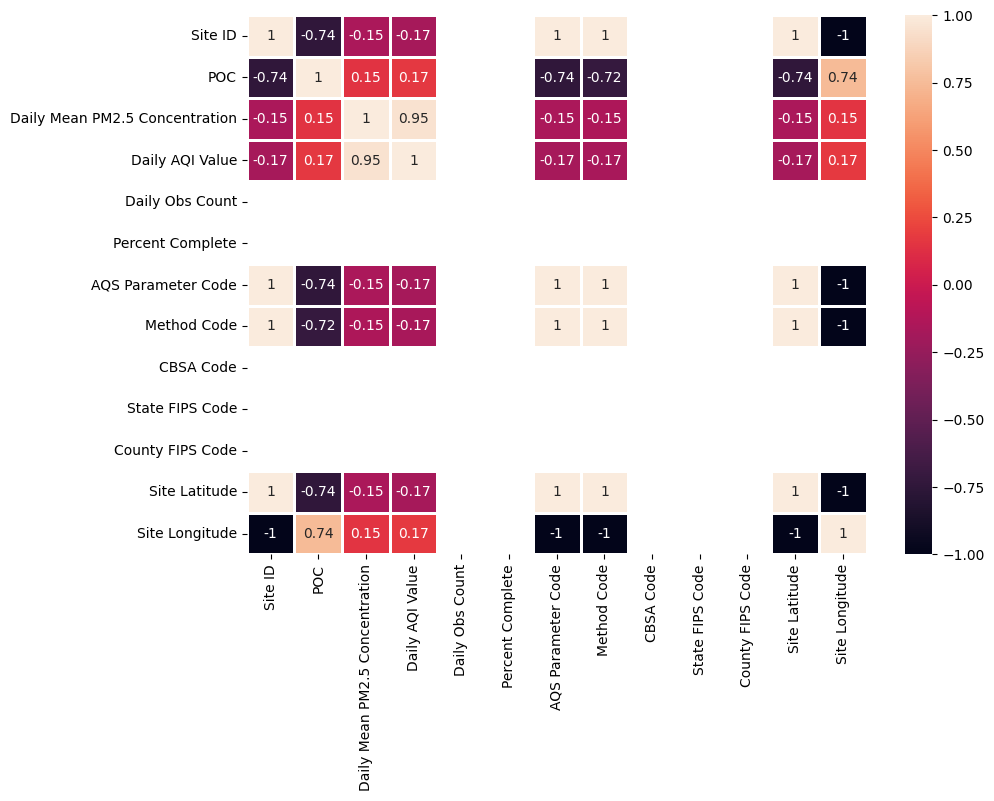

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(),annot=True,linewidths=2)

### Conjuntos de características y variables

**Haga una lista de los nombres de las columnas del dataframe**

In [28]:
l_column = list(df.columns) # Haciendo una lista de las columnas
len_feature = len(l_column) # Longitud de la lista de vectores de columna
l_column

['Date',
 'Source',
 'Site ID',
 'POC',
 'Daily Mean PM2.5 Concentration',
 'Units',
 'Daily AQI Value',
 'Local Site Name',
 'Daily Obs Count',
 'Percent Complete',
 'AQS Parameter Code',
 'AQS Parameter Description',
 'Method Code',
 'Method Description',
 'CBSA Code',
 'CBSA Name',
 'State FIPS Code',
 'State',
 'County FIPS Code',
 'County',
 'Site Latitude',
 'Site Longitude']

In [40]:
#Asignatura
df['Date'] = pd.to_datetime(df['Date'])

In [52]:
# Crear nuevas columnas numéricas
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

# Luego eliminas la original
df = df.drop(columns=["Date"])


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Source                          525 non-null    object 
 1   Site ID                         525 non-null    int64  
 2   POC                             525 non-null    int64  
 3   Daily Mean PM2.5 Concentration  525 non-null    float64
 4   Units                           525 non-null    object 
 5   Daily AQI Value                 525 non-null    int64  
 6   Local Site Name                 525 non-null    object 
 7   Daily Obs Count                 525 non-null    int64  
 8   Percent Complete                525 non-null    float64
 9   AQS Parameter Code              525 non-null    int64  
 10  AQS Parameter Description       525 non-null    object 
 11  Method Code                     525 non-null    int64  
 12  Method Description              525 

**Coloque todas las características numéricas en X y el precio en y, ignore la dirección, que es una cadena para la regresión lineal**

In [56]:
# Definir Y (columna 3)
y = df.iloc[:, 3]   # 'Daily Mean PM2.5 Concentration'

# Definir X quitando la columna 3 y también las categóricas (object)
X = df.drop(columns=["Daily Mean PM2.5 Concentration",
                     "Source", "Units", "Local Site Name",
                     "AQS Parameter Description", "Method Description",
                     "CBSA Name", "State", "County"])

In [57]:
print("Tamaño de Características:",X.shape)
print("Tamaño de Variable Objetivo:",y.shape)

Tamaño de Características: (525, 15)
Tamaño de Variable Objetivo: (525,)


In [58]:
X.head()

,Site ID,POC,Daily AQI Value,Daily Obs Count,Percent Complete,AQS Parameter Code,Method Code,CBSA Code,State FIPS Code,County FIPS Code,Site Latitude,Site Longitude,year,month,day
0,40230004,1,73,1,100.0,88101,143,35700,4,23,31.337204,-110.936718,2022,1,5
1,40230004,1,55,1,100.0,88101,143,35700,4,23,31.337204,-110.936718,2022,1,11
2,40230004,1,66,1,100.0,88101,143,35700,4,23,31.337204,-110.936718,2022,1,17
3,40230004,1,48,1,100.0,88101,143,35700,4,23,31.337204,-110.936718,2022,1,23
4,40230004,1,53,1,100.0,88101,143,35700,4,23,31.337204,-110.936718,2022,1,29


In [59]:
y.head()

,Daily Mean PM2.5 Concentration
0,20.8
1,11.1
2,16.9
3,8.6
4,10.2


### División de entrenamiento-prueba

**Importamos la función train_test_split de scikit-learn**

In [60]:
from sklearn.model_selection import train_test_split

**Creamos los conjuntos de entrenamiento X y de prueba y en un comando usando una proporción de división y una semilla aleatoria**

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Verifique el tamaño y la forma de las divisiones de entrenamiento/prueba (debe estar en la proporción según el parámetro test_size anterior)**

In [62]:
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de características del entrenamiento: (367, 15)
Tamaño del conjunto de características de prueba: (158, 15)
Tamaño de la variable objetivo del entrenamiento: (367,)
Tamaño de la variable objetivo de prueba: (158,)


### Ajuste y entrenamiento del modelo

**Importamos el estimador de modelo de regresión lineal de scikit-learn e lo instanciamos**

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [64]:
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'

**Ajustamos el modelo al propio objeto instanciado**

In [66]:
lm.fit(X_train,y_train) # Ajuste el modelo lineal en el objeto 'lm' en sí, es decir, no es necesario establecer esto en otra variable

LinearRegression()

**Verificamos la intercepción y los coeficientes y los colocamos en un DataFrame**

In [67]:
print("El término de intersección del modelo lineal:", lm.intercept_)

El término de intersección del modelo lineal: 11066.818123915193


In [68]:
print("Los coeficientes del modelo lineal:", lm.coef_)

Los coeficientes del modelo lineal: [-2.75212531e-04  3.91640212e-04  3.16282397e-01  0.00000000e+00
  3.46944695e-18 -1.22676995e-05  5.26988854e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -7.52584630e-12  1.32160753e-11
  0.00000000e+00  8.56819978e-02  1.19176925e-02]


In [69]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
Site ID,-2.752125e-04
POC,3.916402e-04
Daily AQI Value,3.162824e-01
Daily Obs Count,0.000000e+00
Percent Complete,3.469447e-18
AQS Parameter Code,-1.226770e-05
Method Code,5.269889e-03
CBSA Code,0.000000e+00
State FIPS Code,0.000000e+00
County FIPS Code,0.000000e+00


### Cálculo de errores estándar y estadística t para los coeficientes

In [72]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0] * len(X_train.columns)
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

/tmp/ipython-input-3536349415.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))


,Coefficients,Standard Error,t-statistic
Site ID,-2.752125e-04,0.000026,-1.073187e+01
POC,3.916402e-04,0.101742,3.849360e-03
Daily AQI Value,3.162824e-01,0.005304,5.962626e+01
Daily Obs Count,0.000000e+00,inf,0.000000e+00
Percent Complete,3.469447e-18,inf,0.000000e+00
AQS Parameter Code,-1.226770e-05,0.000575,-2.132384e-02
Method Code,5.269889e-03,0.000426,1.235897e+01
CBSA Code,0.000000e+00,inf,0.000000e+00
State FIPS Code,0.000000e+00,inf,0.000000e+00
County FIPS Code,0.000000e+00,inf,0.000000e+00


In [73]:
print("Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda
------------------------------------------------------------------------------------------
Daily AQI Value > 
Method Code > 
month > 
day > 
POC > 
Site Longitude > 
Percent Complete > 
State FIPS Code > 
County FIPS Code > 
Daily Obs Count > 
CBSA Code > 
year > 
Site Latitude > 
AQS Parameter Code > 
Site ID


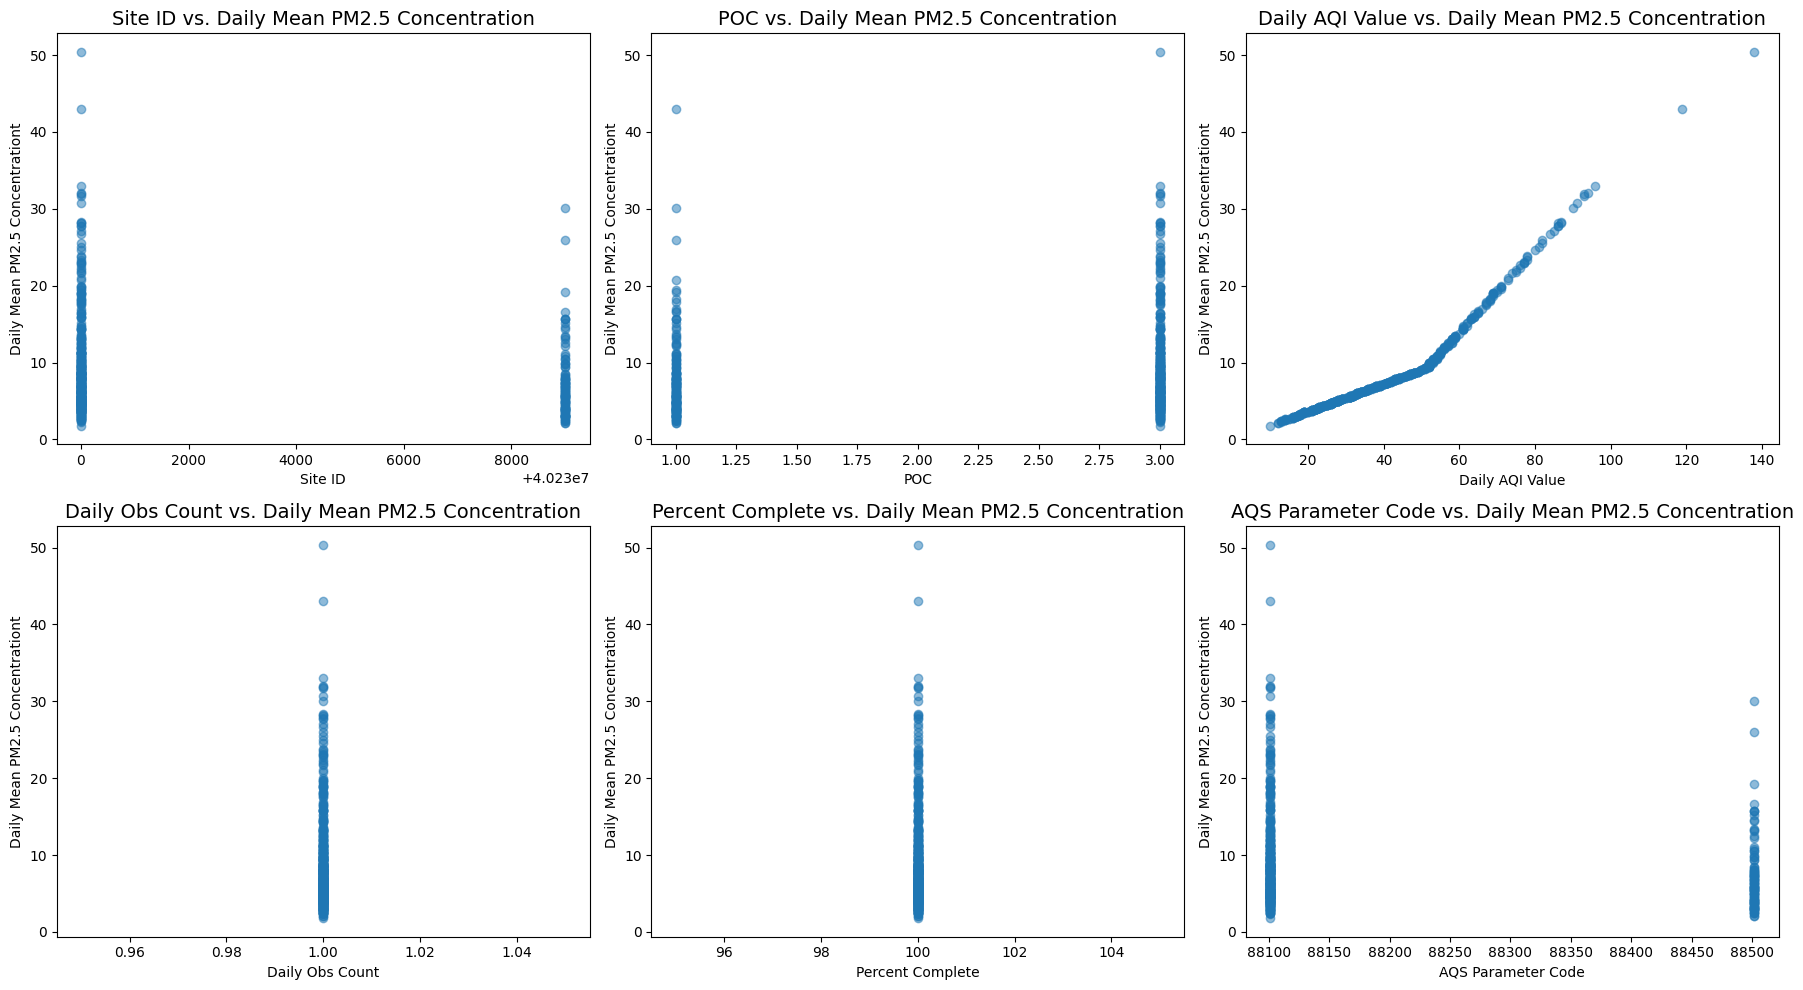

In [75]:
# Lista de columnas (ej: las más importantes del modelo)
l = list(cdf.index)   # asumiendo que cdf tiene tus coeficientes / features ordenadas

# Cuántas variables quieres graficar (ej: 6 primeras)
n = 6
cols_to_plot = l[:n]

# Definir el grid: 2 filas x 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # para iterar fácilmente

# Hacer scatter plot para cada columna contra "Billing Amount"
for i, col in enumerate(cols_to_plot):
    axes[i].scatter(df[col], df["Daily Mean PM2.5 Concentration"], alpha=0.5)
    axes[i].set_title(f"{col} vs. Daily Mean PM2.5 Concentration", fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Daily Mean PM2.5 Concentrationt")

plt.tight_layout()
plt.show()

**R cuadrado del ajuste del modelo**

In [76]:
print("Valor del R cuadrado de este ajuste:",round(metrics.r2_score(y_train,train_pred),3))

Valor del R cuadrado de este ajuste: 0.908


### Matrices de evaluación de predicción, estimación de error y regresión

**Predicción usando el modelo lm**

In [77]:
predictions = lm.predict(X_test)
print ("Tipo del objeto predicho :", type(predictions))
print ("Tamaño del objeto predicho:", predictions.shape)

Tipo del objeto predicho : <class 'numpy.ndarray'>
Tamaño del objeto predicho: (158,)


**Diagrama de dispersión (Scatterplot) del precio previsto y el conjunto de prueba y para ver si los datos caen en una línea recta de 45 grados**

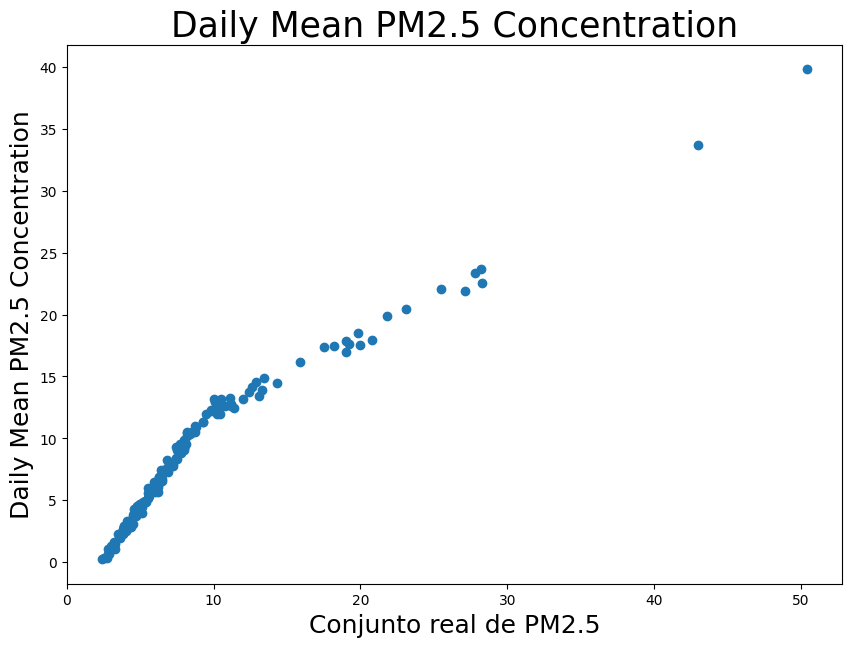

In [85]:
plt.figure(figsize=(10,7))
plt.title("Daily Mean PM2.5 Concentration",fontsize=25)
plt.xlabel("Conjunto real de PM2.5",fontsize=18)
plt.ylabel("Daily Mean PM2.5 Concentration", fontsize=18)
plt.scatter(x=y_test,y=predictions)

**Visualizamos el histograma de los residuos, es decir, errores predichos (se espera un patrón distribuido normalmente)**

/tmp/ipython-input-1939217874.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test-predictions])


<Axes: title={'center': 'Histograma de residuos para verificar la normalidad '}, xlabel='Residuos', ylabel='Densidad del kernel'>

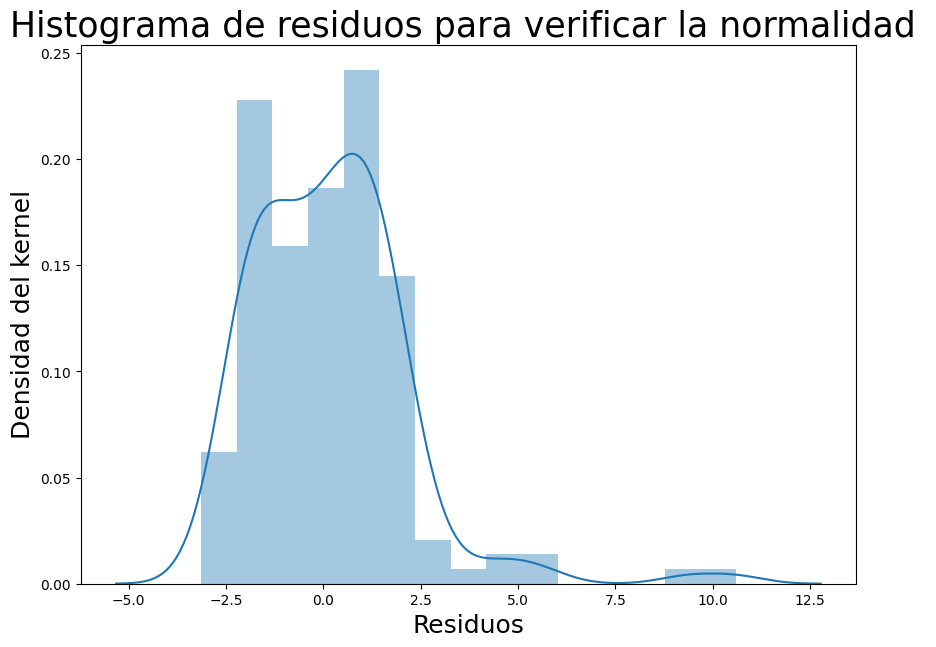

In [80]:
plt.figure(figsize=(10,7))
plt.title("Histograma de residuos para verificar la normalidad ",fontsize=25)
plt.xlabel("Residuos",fontsize=18)
plt.ylabel("Densidad del kernel", fontsize=18)
sns.distplot([y_test-predictions])

**Diagrama de dispersión de residuos y valores predichos (Homoscedasticidad)**


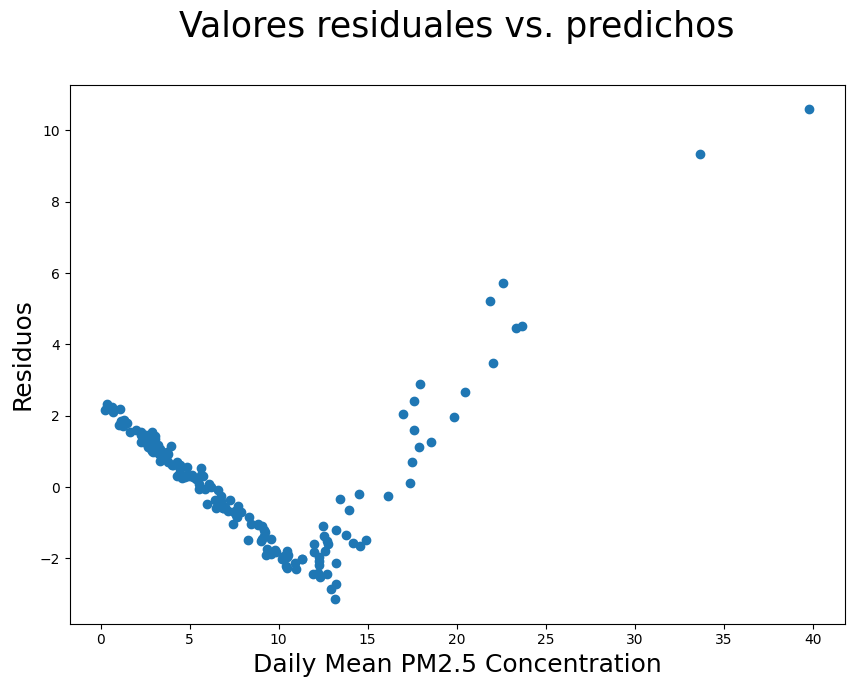

In [84]:
plt.figure(figsize=(10,7))
plt.title("Valores residuales vs. predichos\n",fontsize=25)
plt.xlabel("Daily Mean PM2.5 Concentration",fontsize=18)
plt.ylabel("Residuos", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

**Métricas de evaluación de la regresión**

In [82]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 1.4743793947552808
Mean square error (MSE): 3.988543533106043
Root mean square error (RMSE): 1.9971338295432388


**Valor R cuadrado**

In [83]:
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

Valor R-squared de las predicciones: 0.918
